## Sample paths of stochastic processes.

In [43]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [44]:
sigma = 1.  # Standard deviation.
mu = 10.  # Mean.
tau = .05  # Time constant.

In [45]:
dt = .001  # Time step.
T = 1.  # Total time.
n = int(T / dt)  # Number of time steps.
t = np.linspace(0., T, n)  # Vector of times.

In [46]:
sigma_bis = sigma * np.sqrt(2. / tau)
sqrtdt = np.sqrt(dt)

In [47]:
x = np.zeros(n)

In [48]:
for i in range(n - 1):
    x[i + 1] = x[i] + dt * (-(x[i] - mu) / tau) + sigma_bis * sqrtdt * np.random.randn()

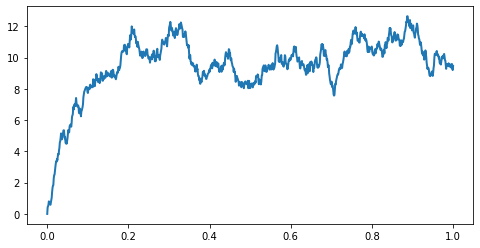

In [49]:
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
ax.plot(t, x, lw=2)

In [50]:
ntrials = 10000
X = np.zeros(ntrials)

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


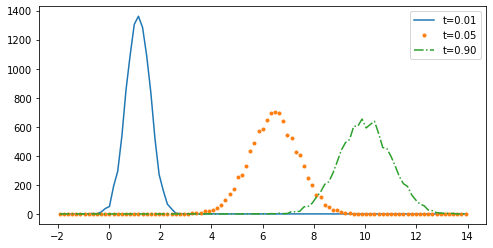

In [51]:
# We create bins for the histograms.
bins = np.linspace(-2., 14., 100)
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
for i in range(n):
    # We update the process independently for
    # all trials
    X += dt * (-(X - mu) / tau) + \
        sigma_bis * sqrtdt * np.random.randn(ntrials)
    # We display the histogram for a few points in
    # time
    if i in (5, 50, 900):
        hist, _ = np.histogram(X, bins=bins)
        ax.plot((bins[1:] + bins[:-1]) / 2, hist,
                {5: '-', 50: '.', 900: '-.', }[i],
                label=f"t={i * dt:.2f}")
    ax.legend()

### Black-Scholes Equation.

In [60]:
sigma = 0.5  # Standard deviation.
mu = 0.05  # Mean.

x = np.zeros(n)
x[0] = 1

In [63]:
for i in range(n - 1):
    x[i + 1] = x[i] + dt * (mu*x[i]) + (sigma*x[i]) * sqrtdt * np.random.randn()

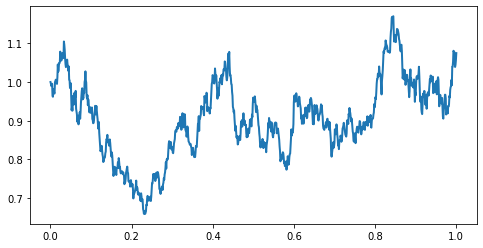

In [64]:
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
ax.plot(t, x, lw=2)

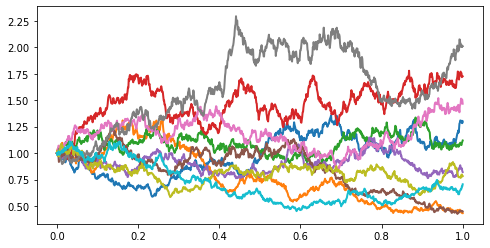

In [65]:
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
for samples in range(10):  
    for i in range(n - 1):
        x[i + 1] = x[i] + dt * (mu*x[i]) + (sigma*x[i]) * sqrtdt * np.random.randn()
        
    ax.plot(t, x, lw=2)

In [72]:
def wiener_process(x0, n):

    w = np.ones(n)*x0

    for i in range(1,n):
        # Sampling from the Normal distribution
        yi = np.random.normal()
        # Weiner process
        w[i] = w[i-1]+(yi/np.sqrt(n))

    return w

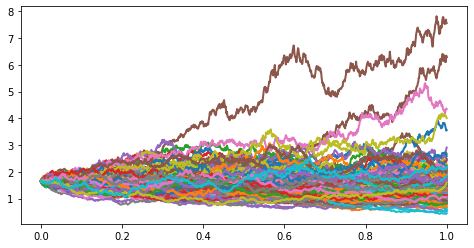

In [79]:
x0 = 1

fig, ax = plt.subplots(1, 1, figsize=(8, 4))
for samples in range(100): 
    #xa = np.zeros(n)
    W = wiener_process(x0, n)
    #for i in range(n):
    xa = x0*np.exp((mu - sigma**2/2)*t+sigma*W)
        
    ax.plot(t, xa, lw=2)